**1)** Using the telco_churn database,extract a table where each observation(row) is a customer with a 2-year contract and include the following information customer id,tenure,monthly charges, and total charges

**2)** Export the table to a csv

**3)** Create a jupyter notebook titled "regression_yourfirstlastname"

USE telco_churn;
SELECT customers.customer_id,customers.tenure,customers.monthly_charges,customers.total_charges FROM customers
JOIN contract_types AS contract ON (customers.contract_type_id=contract.contract_type_id)
WHERE contract.contract_type='Two year';

**4)** Prepare the Environment
(do not copy and paste...manually type so that you remember what you need. You will do this often!)

In [39]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

#Wrangling
import pandas as pd

#Exploring
import scipy.stats as stats

#Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("classic")

#Modeling
import statsmodels.api as sm

from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,median_absolute_error

**5)** Read your csv into a dataframe named `mydf`

In [40]:
mydf=pd.read_csv("~/Desktop/two_year_contract.csv")

**6)** How many rows are in your dataframe?

In [41]:
mydf.shape

(1695, 4)

**7)** What is the data type of the field containing the customer ids?

In [42]:
mydf.dtypes

customer_id         object
tenure               int64
monthly_charges    float64
total_charges       object
dtype: object

**8)** Print to the notebook the last 10 rows of your dataframe.

In [43]:
mydf.tail(n=10)

,customer_id,tenure,monthly_charges,total_charges
1685,9945-PSVIP,25,18.70,383.65
1686,9950-MTGYX,28,20.30,487.95
1687,9953-ZMKSM,63,25.25,1559.3
1688,9958-MEKUC,72,103.95,7517.7
1689,9959-WOFKT,71,106.70,7382.25
1690,9964-WBQDJ,71,24.40,1725.4
1691,9972-EWRJS,67,19.25,1372.9
1692,9975-GPKZU,46,19.75,856.5
1693,9993-LHIEB,67,67.85,4627.65
1694,9995-HOTOH,63,59.00,3707.6


**9)** What is the IQR of tenure? monthly charges? total charges?

In [44]:
mydf.describe()

,tenure,monthly_charges
count,1695.000000,1695.000000
mean,56.735103,60.770413
std,18.209363,34.678865
min,0.000000,18.400000
25%,48.000000,24.025000
50%,64.000000,64.350000
75%,71.000000,90.450000
max,72.000000,118.750000


the `total_charges` column is the wrong data type so check for missing values or other issue

**10)**How many missing values are in each variable?

In [63]:
mydf.isna().sum()

customer_id        0
tenure             0
monthly_charges    0
total_charges      0
dtype: int64

In [64]:
mydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 4 columns):
customer_id        1695 non-null object
tenure             1695 non-null int64
monthly_charges    1695 non-null float64
total_charges      1695 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 53.0+ KB


visual inspection of csv shows blanks with spaces. This is causing the problem. Convert these to zeros.

In [57]:
mydf['total_charges']=mydf.total_charges.replace(' ',0)

In [58]:
#verify the spaces are gone
mydf[mydf['total_charges']==' ']

,customer_id,tenure,monthly_charges,total_charges


In [61]:
#change data type to float once the spaces are gone
mydf['total_charges'] = pd.to_numeric(mydf.total_charges, errors='coerce')

In [62]:
#verify float type conversion for total_charges column
mydf.dtypes

customer_id         object
tenure               int64
monthly_charges    float64
total_charges      float64
dtype: object

In [67]:
#now re-run describe to find IQR
mydf_stats=mydf.describe()
IQR=mydf_stats.loc['75%']-mydf_stats.loc['25%']
print(IQR)

tenure               23.000
monthly_charges      66.425
total_charges      4719.125
dtype: float64


**12)** Show the distribution of monthly charges through a histogram

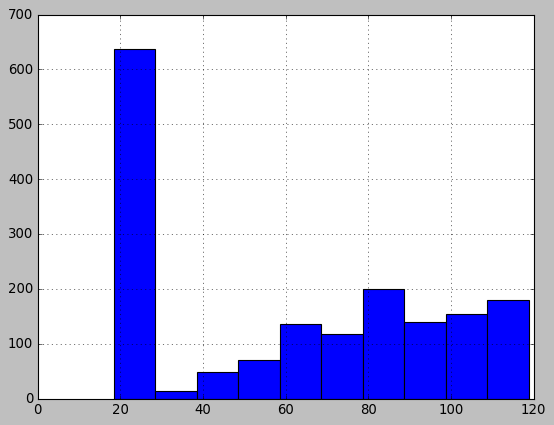

In [68]:
mydf.monthly_charges.hist()

**13)** Create a new dataframe,`myvars`,that contains `tenure`,`monthly charges`,and `total_charges`, but not `customer_id`.

In [69]:
myvars=mydf.drop(columns=['customer_id'])

In [70]:
myvars.head()

,tenure,monthly_charges,total_charges
0,71,109.70,7904.25
1,63,84.65,5377.80
2,65,90.45,5957.90
3,54,45.20,2460.55
4,72,116.80,8456.75


**14)** Create a box plot of each variable in your dataframe,`myvars`.This should be a single chart with 3 categorical plots,1 for each `tenure`,`monthly_charges`,`total_charges`

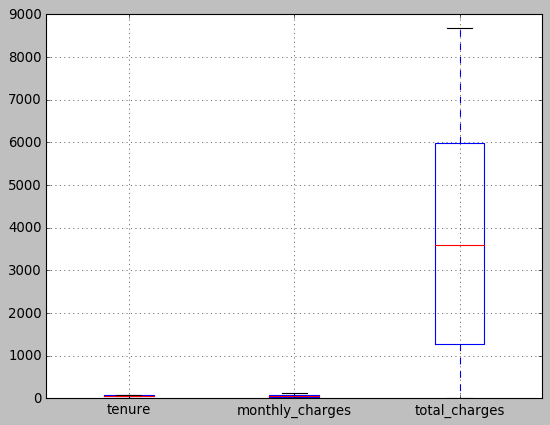

In [71]:
myvars.boxplot()

**15)** Split your data into a test and train dataset.Set your random state to 123. You should end up with 4 dataframes:`X_train`,`X_test`,`y_train`,`y_test`.

In [75]:
X_train,X_test,y_train,y_test=train_test_split(myvars.drop(['total_charges'],axis=1),myvars[['total_charges']],train_size=.8,
random_state=123)

**16)** Create a scatterplot for each combination of variables

**17)** Create a heatmap containing the 3 variables.

**18)** Compute the pearson's correlation coefficent and print it's value in the sentence
"Pearson's R is the input value here up to 4 decimal places with a signifcance p-value of <p-value up to 4 decimal places>"

**19)** Train (aka fit) a linear regression model,modeling `total_charges` as a linear function of `tenure`. Assign your model to the variable `mylm`

In [76]:
mylm=LinearRegression()

In [78]:
mylm.fit(X_train[['tenure']],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

**20)** What is the y-intercept of the regression line? Translate the intercept in plain english, i.e. what it means in the context of the data.

In [79]:
lm_y_intercept=mylm.intercept_
print(lm_y_intercept)

[-1443.78687828]


In terms of the data the y-intercept means a new customer(`tenure`=0) has a credit of 1443 dollars on their account.

**21)** What is the slope of the regression line? Translate the slope in plain english, i.e. what it means in the context of the data.

In [82]:
lm_coefficients = mylm.coef_
print(lm_coefficients)

[[90.86790727]]


In the context of the data the slope means that for every additional month of tenure the total charges go up by around 90 dollars.

**22)** Write the linear function in the form y=mx+b using the parameters that were estimated from the algorithm and the variable names for y nad x specific to your data.

total_charges=90.87*tenure-1443.79

**23)** Test your model on the training sample. That is,use your newly fit model to predict the `total_charges` using `tenure`.

In [88]:
y_pred_mylm=mylm.predict(X_train[['tenure']])

**24)** Evaluate the model's performance using r-squared,mean squared error,and median absolute error.

In [94]:
r2_mylm=r2_score(y_train,y_pred_mylm)
print("r-squared: %.2f" % r2_mylm)
mse_mylm = mean_squared_error(y_train, y_pred_mylm)
print("Mean squared error: %.2f" % mse_mylm)
mae_mylm=median_absolute_error(y_train,y_pred_mylm)
print("Mean squared error: %.2f" % mae_mylm)

r-squared: 0.40
Mean squared error: 4020944.50
Mean squared error: 1538.14


**25)** Summarize your r-squared value in a sentence,without hard coding the value,represent r-squared as a percent.

In [93]:
r2_mylm=r2_score(y_train,y_pred_mylm)
print('{:.2%} of the variance in the total charges can be explained by the tenure of the customer.'
      .format(r2_mylm))

40.32% of the variance in the total charges can be explained by the tenure of the customer.


**26)** Test your model on the test sample.

In [96]:
y_pred=mylm.predict(X_test[['tenure']])

**27)** Evaluate your model's performance on test sample. How do each of the metrics compare to that of the training sample? How can you explain the reason for the difference?
